In [1]:
import pandas as pd
data  = pd.read_excel('2017捷運人流_日期時間合併.xlsx', engine='openpyxl')
for i in range(18,24):
    dataset = pd.read_excel(f'20{i}捷運人流_日期時間合併.xlsx', engine='openpyxl')
    data = pd.concat([data,dataset],ignore_index=True)
print(data.shape)

(5524168, 5)


# 資料預處理

In [2]:
data['Date'] = pd.to_datetime(data['Date'])
datasets = data.drop('出站',axis=1)
selected_station = ['幸福','新北產業園區','新埔民生','板橋','板新','中原','橋和','中和','景平','秀朗橋','十四張','Y板橋']
# filtered_data = datasets[datasets['Station'].isin(selected_station)]
datasets = datasets[~datasets['Station'].isin(selected_station)]  #  ~ 反向運算符號
datasets.dtypes

Date         datetime64[ns]
時段                    int64
Station              object
CrowdFlow             int64
dtype: object

In [3]:
# 下關於星期的標籤
datasets['Weekday'] = data['Date'].dt.weekday
weekday = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
datasets['Weekday'] = datasets['Weekday'].map(lambda x: weekday[x])
datasets.head()

,Date,時段,Station,CrowdFlow,Weekday
0,2017-01-01,0,BL板橋,361,Sun
1,2017-01-01,0,七張,56,Sun
2,2017-01-01,0,三和國中,52,Sun
3,2017-01-01,0,三民高中,38,Sun
4,2017-01-01,0,三重,35,Sun


In [4]:
# 針對站點下路線標籤
# R為淡水信義線、BR文湖線、G為松山新店線、O為中和新蘆線、BL為板南線、
station_to_routes = {
'動物園':'BR','木柵':'BR','萬芳社區':'BR','萬芳醫院':'BR','辛亥':'BR','麟光':'BR','六張犁':'BR','科技大樓':'BR','大安':['BR','R'],'忠孝復興':['BR','BL'],'南京復興':['BR','G'],'中山國中':'BR','松山機場':'BR','大直':'BR','劍南路':'BR','西湖':'BR','港墘':'BR','文德':'BR','內湖':'BR','大湖公園':'BR','葫洲':'BR','東湖':'BR','南港軟體園區':'BR','南港展覽館':['BR','BL'],'象山':'R','台北101/世貿':'R','世貿':'R','信義安和':'R','大安森林公園':'R','東門':['R','O'],'中正紀念堂':['R','G'],'台大醫院':'R','台北車站':['R','BL'],'中山':['R','G'],'雙連':'R','民權西路':['R','O'],'圓山':'R','劍潭':'R','士林':'R','芝山':'R','明德':'R','石牌':'R','唭哩岸':'R','奇岩':'R','北投':'R','新北投':'R','復興崗':'R','忠義':'R','關渡':'R','竹圍':'R','紅樹林':'R','淡水':'R','頂埔':'BL','永寧':'BL','土城':'BL','海山':'BL','亞東醫院':'BL','府中':'BL','BL板橋':'BL','新埔':'BL','江子翠':'BL','龍山寺':'BL','西門':['BL','G'],'善導寺':'BL','忠孝新生':['BL','O'],'忠孝敦化':'BL','國父紀念館':'BL','市政府':'BL','永春':'BL','後山埤':'BL','昆陽':'BL','南勢角':'O','景安':'O','永安市場':'O','頂溪':'O','古亭':['O','G'],'松江南京':['O','G'],'行天宮':'O','中山國小':'O','大橋頭站':'O','台北橋':'O','菜寮':'O','三重':'O','先嗇宮':'O','頭前庄':'O','新莊':'O','輔大':'O','丹鳳':'O','迴龍':'O','三重國小':'O','三和國中':'O','徐匯中學':'O','三民高中':'O','蘆洲':'O','新店':'G','新店區公所':'G','七張':'G','小碧潭':'G','大坪林':'G','景美':'G','萬隆':'G','公館':'G','台電大樓':'G','小南門':'G','北門':'G','台北小巨蛋':'G','南京三民':'G','松山':'G','南港':'BL'
}
datasets['Routes'] = datasets['Station'].map(station_to_routes)
datasets['Routes'].isna().sum()

0

In [5]:
# 國定假日
hoilday = pd.read_excel('holiday_Calendar.xlsx')
hoilday["Date"] = pd.to_datetime(hoilday["年"].astype(str) + "-" + hoilday["月"].astype(str) + "-" + hoilday["日"].astype(str))
hoildays = hoilday["Date"]
datasets['Hoilday'] = datasets['Date'].isin(hoildays)
datasets[datasets['Hoilday'] == False]

,Date,時段,Station,CrowdFlow,Weekday,Routes,Hoilday
108,2017-01-01 01:00:00,1,BL板橋,1,Sun,BL,False
109,2017-01-01 01:00:00,1,七張,1,Sun,G,False
110,2017-01-01 01:00:00,1,三和國中,1,Sun,O,False
111,2017-01-01 01:00:00,1,三民高中,0,Sun,O,False
112,2017-01-01 01:00:00,1,三重,0,Sun,O,False
...,...,...,...,...,...,...,...
5524163,2023-04-30 23:00:00,23,頂埔,53,Sun,BL,False
5524164,2023-04-30 23:00:00,23,頂溪,317,Sun,O,False
5524165,2023-04-30 23:00:00,23,頭前庄,68,Sun,O,False
5524166,2023-04-30 23:00:00,23,麟光,24,Sun,BR,False


In [6]:
# 尖峰離峰下標籤
datasets['Peak'] = False
filter_condition = (datasets['Weekday'].isin(['Mon','Tue','Wed','Thr','Fri'])) & (datasets['時段'].isin([7, 8, 17, 18, 19]))
datasets.loc[filter_condition, 'Peak'] = True

In [82]:
datasets['時段'] = datasets['時段'].astype(str)
datasets

,Date,時段,Station,CrowdFlow,Weekday,Routes,Hoilday,Peak
0,2017-01-01 00:00:00,0,BL板橋,361,Sun,BL,True,False
1,2017-01-01 00:00:00,0,七張,56,Sun,G,True,False
2,2017-01-01 00:00:00,0,三和國中,52,Sun,O,True,False
3,2017-01-01 00:00:00,0,三民高中,38,Sun,O,True,False
4,2017-01-01 00:00:00,0,三重,35,Sun,O,True,False
...,...,...,...,...,...,...,...,...
5524163,2023-04-30 23:00:00,23,頂埔,53,Sun,BL,False,False
5524164,2023-04-30 23:00:00,23,頂溪,317,Sun,O,False,False
5524165,2023-04-30 23:00:00,23,頭前庄,68,Sun,O,False,False
5524166,2023-04-30 23:00:00,23,麟光,24,Sun,BR,False,False


In [39]:
print(datasets.dtypes)
print("-"*50)
print(f'總樣本數:{len(datasets)}')
print("-"*50)
print(datasets.CrowdFlow.describe().astype(int))

Date         datetime64[ns]
時段                   object
Station              object
CrowdFlow             int64
Weekday              object
Routes               object
Hoilday                bool
Peak                   bool
dtype: object
--------------------------------------------------
總樣本數:5243184
--------------------------------------------------
count    5243184
mean         820
std         1175
min            0
25%          158
50%          469
75%         1031
max        21066
Name: CrowdFlow, dtype: int32


# 探討各因子之間對人流的影響是否顯著

ShapiroResult(statistic=0.9158535599708557, pvalue=3.6323434926543996e-08)
    時段 Weekday  CrowdFlow
0    0     Fri    5636492
1    0     Mon    3168365
2    0     Sat    5492989
3    0     Sun    3480746
4    0     Thr    3657834
..  ..     ...        ...
160  9     Sat   27017973
161  9     Sun   21534182
162  9     Thr   42667087
163  9     Tue   42436733
164  9     Wed   42321367

[165 rows x 3 columns]


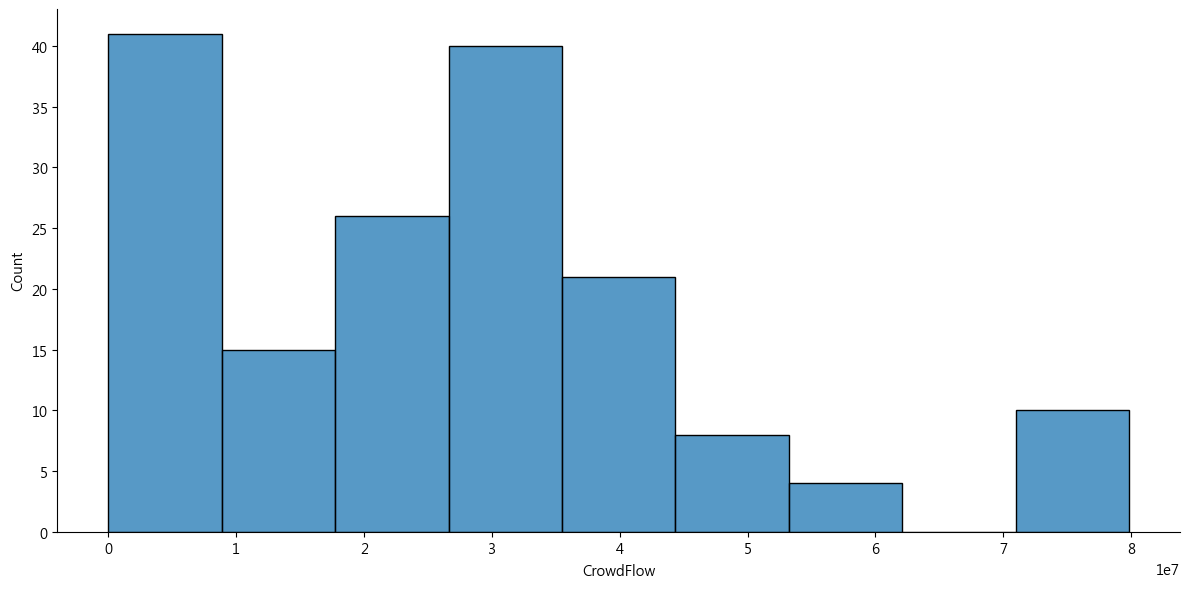

In [85]:
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
anova_data = datasets[['時段','Weekday','CrowdFlow']].groupby(['時段','Weekday']).sum().reset_index()
print(stats.shapiro(anova_data['CrowdFlow']))
sns.displot(x=anova_data['CrowdFlow'], data=anova_data, aspect=2, height=6)
print(anova_data)
# 不符合常態分佈，無法用anova table

In [86]:
# 因為不符合常態分布，必須用無母數分析
grouped_data = anova_data.groupby('Weekday')['CrowdFlow'].apply(list)
print(grouped_data)
# 進行Kruskal-Wallis檢驗
statistic, p_value = stats.kruskal(*grouped_data)

# 輸出結果
print("Kruskal-Wallis Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# 無法拒絕虛無假設，即不同的Weekday之間人流量的中位數沒有顯著的差異

grouped_data = anova_data.groupby('時段')['CrowdFlow'].apply(list)
print(grouped_data)
# 進行Kruskal-Wallis檢驗
statistic, p_value = stats.kruskal(*grouped_data)

# 輸出結果
print("Kruskal-Wallis Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# 拒絕虛無假設，即不同的時段之間人流的中位數有顯著差異

Weekday
Fri    [5636492, 238619, 27222178, 26132395, 29042274...
Mon    [3168365, 198288, 25918574, 24328208, 26270195...
Sat    [5492989, 246654, 29219162, 33749641, 36170519...
Sun    [3480746, 213264, 24847197, 30198881, 31611520...
Thr    [3657834, 145749, 26498916, 24450233, 26844265...
Tue    [3295303, 202681, 26148423, 24041034, 26307633...
Wed    [3436657, 84880, 26121286, 24445093, 27200207,...
Name: CrowdFlow, dtype: object
Kruskal-Wallis Test:
Statistic: 3.077533510666001
p-value: 0.7990545568554176
時段
0     [5636492, 3168365, 5492989, 3480746, 3657834, ...
1     [238619, 198288, 246654, 213264, 145749, 20268...
10    [27222178, 25918574, 29219162, 24847197, 26498...
11    [26132395, 24328208, 33749641, 30198881, 24450...
12    [29042274, 26270195, 36170519, 31611520, 26844...
13    [30910996, 27260744, 38846741, 33954215, 28094...
14    [29306295, 25848930, 37373932, 34708081, 26233...
15    [29711492, 26228153, 37048942, 34544501, 26708...
16    [37432619, 32270358, 404411

In [ ]:
# 錯誤分析不理會
# model = ols('CrowdFlow ~ Weekday + 時段', data=anova_data).fit()
# anova_table_weekday = sm.stats.anova_lm(model, typ=2)
# print(anova_table_weekday)
# print('*'*70)
# model = ols('CrowdFlow ~ 時段', data=anova_data).fit()
# anova_table_time = sm.stats.anova_lm(model, typ=2)
# print(anova_table_time)
# print('*'*70)

# Weekday和CrowdFlow

In [12]:
data_weekday = datasets[['Weekday','CrowdFlow']].groupby('Weekday').sum().reset_index()
print(data_weekday)
data_weekday.describe().astype(int)

  Weekday  CrowdFlow
0     Fri  690465493
1     Mon  620961269
2     Sat  567013116
3     Sun  479598891
4     Thr  653059418
5     Tue  640789507
6     Wed  650024041


,CrowdFlow
count,7
mean,614558819
std,70363008
min,479598891
25%,593987192
50%,640789507
75%,651541729
max,690465493


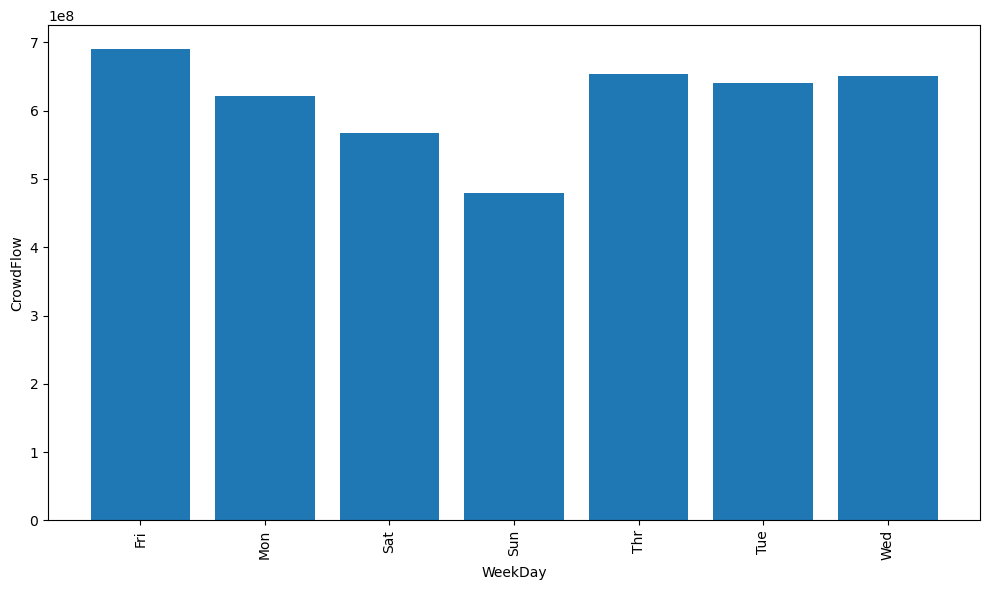

In [13]:
import matplotlib.pyplot as plt
x = data_weekday['CrowdFlow']
weekday = data_weekday['Weekday']

plt.figure(figsize=(10, 6))

plt.bar(weekday, x)
plt.xlabel('WeekDay')
plt.ylabel('CrowdFlow')
plt.xticks(range(len(weekday)), weekday, rotation=90)
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()
plt.show()

# 站點與累積人次

In [14]:
data_station = datasets.groupby('Station').sum('CrowFlow').drop(['時段','Peak','Hoilday'],axis=1)
data_station

,CrowdFlow
Station,
BL板橋,82335950
七張,33492866
三和國中,25374997
三民高中,24654717
三重,13796555
...,...
頂埔,17822602
頂溪,72323868
頭前庄,11450310


In [15]:
print(data_station.describe().astype(int))

# 人數累積在75%以上的站點
data_station[(data_station["CrowdFlow"] >= 51992967)].index

       CrowdFlow
count        108
mean    39832516
std     35841951
min      5168564
25%     19689344
50%     29460190
75%     51992967
max    305642552


Index(['BL板橋', '中山', '中正紀念堂', '公館', '劍潭', '南京復興', '南港展覽館', '古亭', '台北101/世貿',
       '台北車站', '圓山', '士林', '市政府', '府中', '忠孝復興', '忠孝敦化', '忠孝新生', '新埔', '景安',
       '松江南京', '永安市場', '淡水', '石牌', '行天宮', '西門', '頂溪', '龍山寺'],
      dtype='object', name='Station')

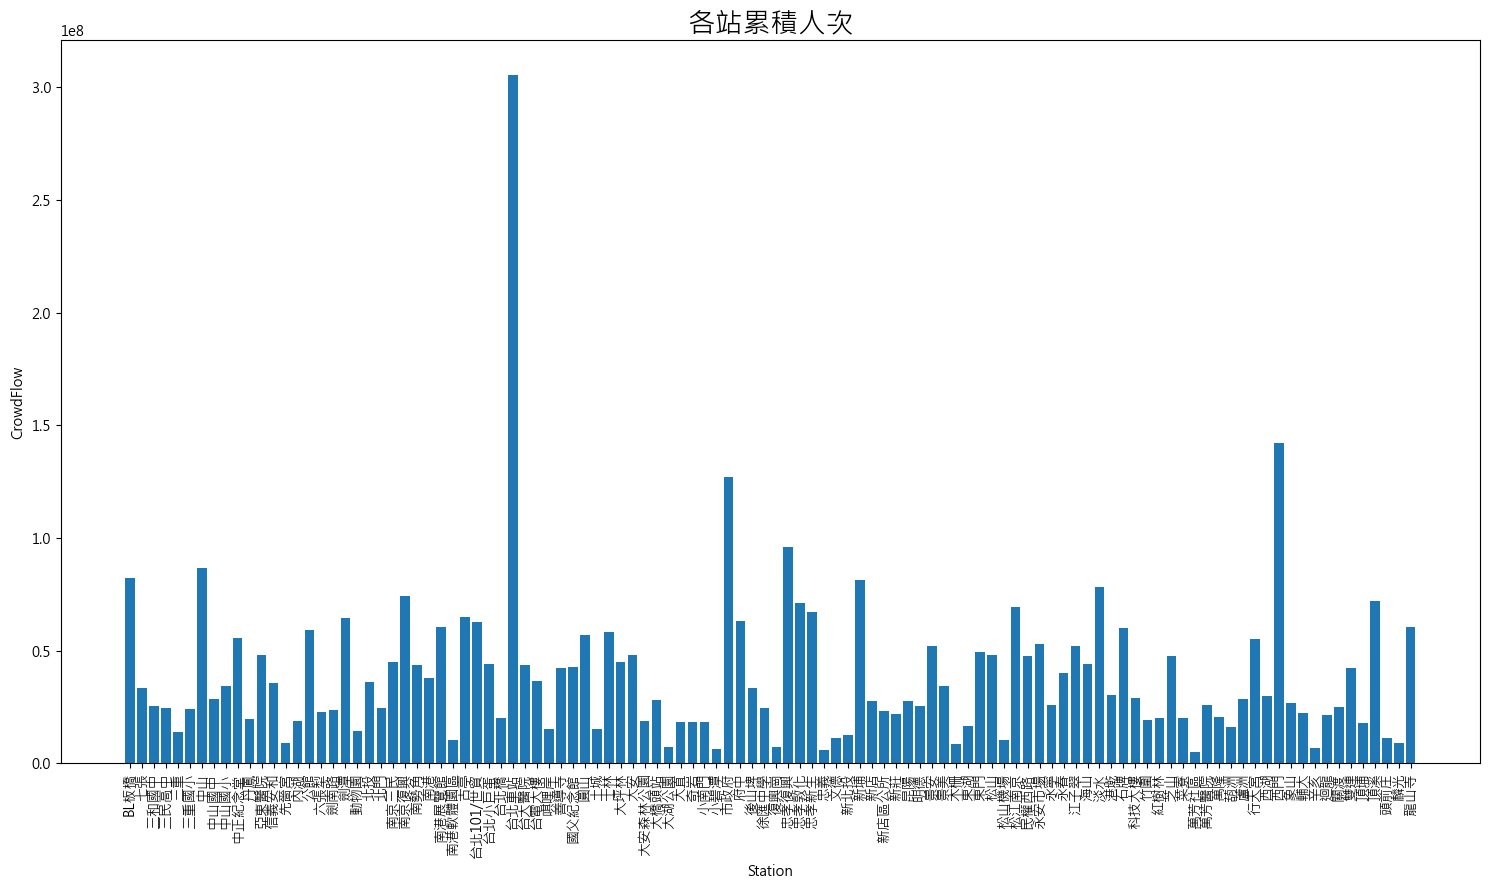

In [16]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

x = data_station['CrowdFlow'].values
stations = data_station.index

plt.figure(figsize=(15, 9))

plt.title('各站累積人次', fontsize=20)
plt.bar(stations, x)
plt.xlabel('Station')
plt.ylabel('CrowdFlow')
plt.xticks(range(len(stations)), stations, rotation=90)
plt.subplots_adjust(bottom=0.3)

plt.tight_layout()
plt.show()

# 時段與累積人次

In [27]:
data_time = datasets[['時段','CrowdFlow']].groupby('時段').sum('CrowdFlow').reset_index()
data_time

,時段,CrowdFlow
0,0,28168386
1,1,1330135
2,2,385011
3,3,170526
4,4,97769
5,5,166232
6,6,58123348
7,7,227559171
8,8,415596862
9,9,257553445


In [28]:
data_time['CrowdFlow'].describe().astype(int)

count           24
mean     179246322
std      135557906
min          97769
25%       50634607
50%      204537208
75%      232294295
max      469447772
Name: CrowdFlow, dtype: int32

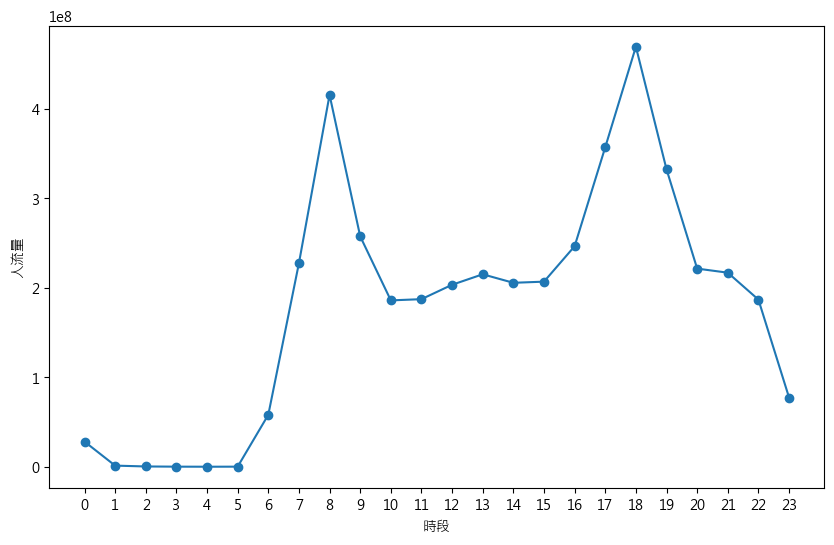

In [29]:
x = data_time.index.astype(str)  
y = data_time['CrowdFlow']  

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o')
plt.xlabel('時段')
plt.ylabel('人流量')
plt.xticks(x)


plt.show()

# 疫情期間影響的旅運量

In [125]:
start_date = pd.to_datetime('2021-7-27').date()
end_date = pd.to_datetime('2022-2-28').date()
df_covid = datasets[(datasets['Date'].dt.date >= start_date) & (datasets['Date'].dt.date <= end_date)] 
df_after_covid = datasets[datasets['Date'].dt.date > end_date]
df_before_covid = datasets[datasets['Date'].dt.date < start_date]

# 畫成線圖需要
df_covid_station = df_covid[['Station','CrowdFlow']].groupby('Station').mean().reset_index()
df_after_covid_station = df_after_covid[['Station','CrowdFlow']].groupby('Station').mean().reset_index()
df_before_covid_station = df_before_covid[['Station','CrowdFlow']].groupby('Station').mean().reset_index()

In [126]:
df_after_covid

,Date,時段,Station,CrowdFlow,Weekday,Routes,Hoilday,Peak
4459237,2022-03-01 00:00:00,0,BL板橋,104,Tue,BL,False,False
4459239,2022-03-01 00:00:00,0,七張,41,Tue,G,False,False
4459240,2022-03-01 00:00:00,0,三和國中,13,Tue,O,False,False
4459241,2022-03-01 00:00:00,0,三民高中,11,Tue,O,False,False
4459242,2022-03-01 00:00:00,0,三重,26,Tue,O,False,False
...,...,...,...,...,...,...,...,...
5524163,2023-04-30 23:00:00,23,頂埔,53,Sun,BL,False,False
5524164,2023-04-30 23:00:00,23,頂溪,317,Sun,O,False,False
5524165,2023-04-30 23:00:00,23,頭前庄,68,Sun,O,False,False
5524166,2023-04-30 23:00:00,23,麟光,24,Sun,BR,False,False


In [127]:
df_before_covid

,Date,時段,Station,CrowdFlow,Weekday,Routes,Hoilday,Peak
0,2017-01-01 00:00:00,0,BL板橋,361,Sun,BL,True,False
1,2017-01-01 00:00:00,0,七張,56,Sun,G,True,False
2,2017-01-01 00:00:00,0,三和國中,52,Sun,O,True,False
3,2017-01-01 00:00:00,0,三民高中,38,Sun,O,True,False
4,2017-01-01 00:00:00,0,三重,35,Sun,O,True,False
...,...,...,...,...,...,...,...,...
3916592,2021-07-26 23:00:00,23,頂埔,25,Mon,BL,False,False
3916593,2021-07-26 23:00:00,23,頂溪,82,Mon,O,False,False
3916594,2021-07-26 23:00:00,23,頭前庄,21,Mon,O,False,False
3916595,2021-07-26 23:00:00,23,麟光,5,Mon,BR,False,False


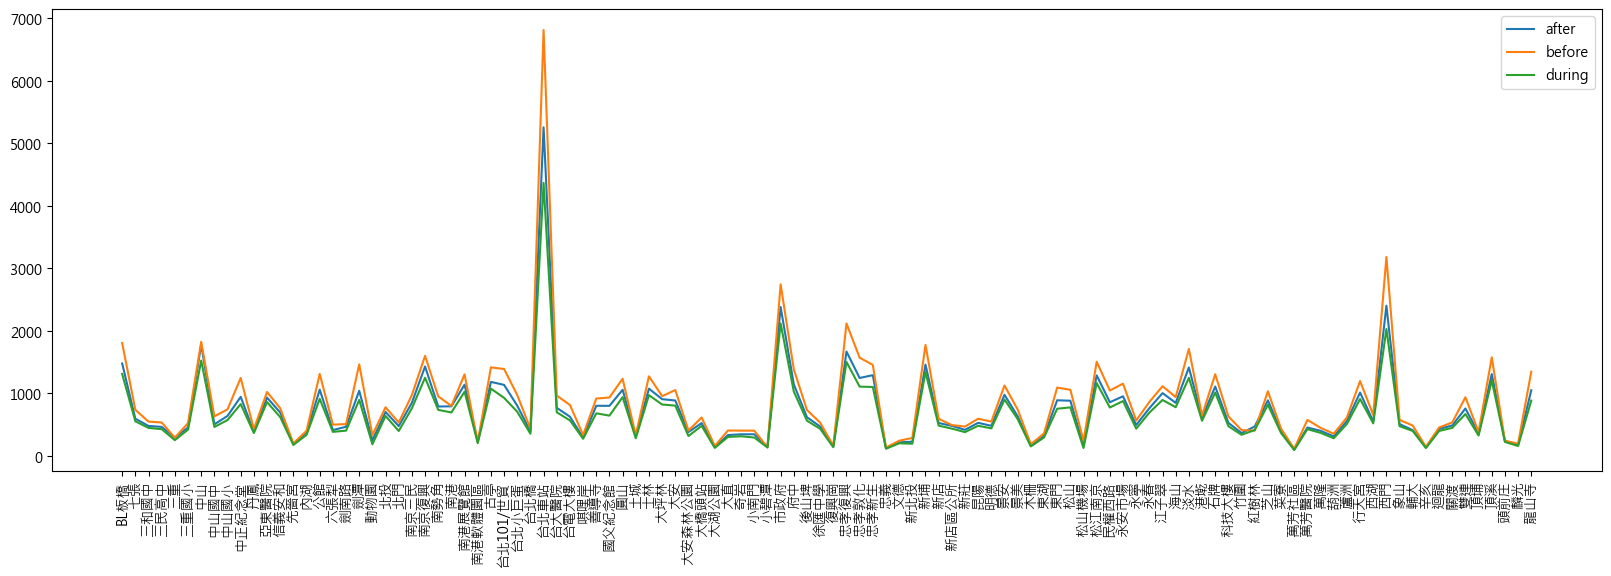

In [128]:
# 畫圖
plt.figure(figsize=(20,6))

plt.plot(df_after_covid_station['Station'],df_after_covid_station['CrowdFlow'],label = 'after')
plt.plot(df_before_covid_station['Station'],df_before_covid_station['CrowdFlow'],label = 'before')
plt.plot(df_covid_station['Station'],df_covid_station['CrowdFlow'],label= 'during')

plt.xticks(range(len(stations)), stations, rotation=90)

plt.legend()
plt.show()